# Iphone Purchases

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:/Users/Legion/Downloads/Files (2)/Files/KNN_Project_5&6/KNN Assignment/iphone_purchase_records.csv")
df.head(3)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [4]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [6]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [7]:
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

In [8]:
X = df.drop('Purchase Iphone', axis=1)
y = df['Purchase Iphone']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Bangalore House

In [13]:
data = pd.read_csv(r"C:\Users\Legion\Downloads\Files (5)\Files\KNN_Project_5&6\KNN Assignment\bangalore_houseprice.csv")
data.head(3)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855613,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


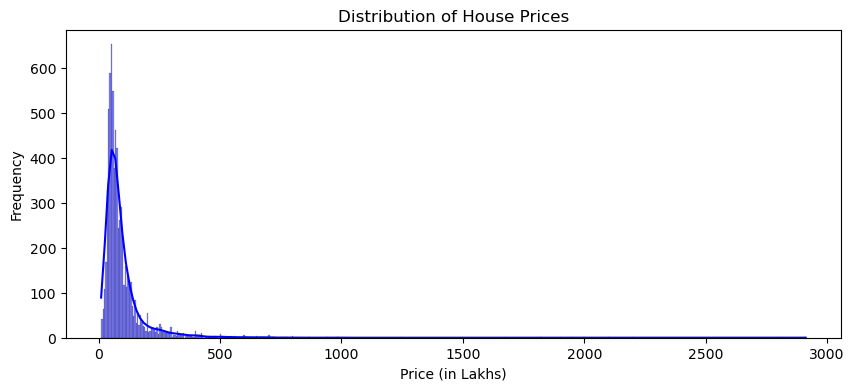

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [30]:
y_pred = knn_model.predict(X_test_scaled)

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 41.88
R² Score: 0.85
